[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dancsomarci/Self-Driving-in-Duckietown/blob/milestone_1/Visualization.ipynb)

In [1]:
# Importing dependencies
from matplotlib import pyplot as plt
import zipfile
import pickle
import os
import cv2
import random
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline 

In [3]:
# Download raw dataset from google drive
# For faster speeds only part of the dataset is downloaded
!gdown 1ijLy-ApHuiVXo78gSbi7nqeRBXzZJHBl --output /tmp/savedData.zip
local_zip = '/tmp/savedData.zip'
raw_data_path = "/tmp/savedData/"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall(raw_data_path)
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1ijLy-ApHuiVXo78gSbi7nqeRBXzZJHBl
To: /tmp/savedData.zip
100% 34.9M/34.9M [00:00<00:00, 230MB/s]


In [4]:
sampled_frames = []

# Reading saved raw data into sampled_frames
for filename in os.listdir(raw_data_path):
    file = open(os.path.join(raw_data_path, filename), "rb")
    sampled_frames = random.sample(pickle.load(file), 5)

In [5]:
def display_frames(frames: list, cmap=None):
  fig, axs = plt.subplots(1, len(frames), figsize=(20,20))
  fig.tight_layout()
  for ax, (label, img) in zip(axs, frames):
    ax.imshow(img, cmap=cmap)
    ax.set_title("label: " + str(label))

  plt.show()

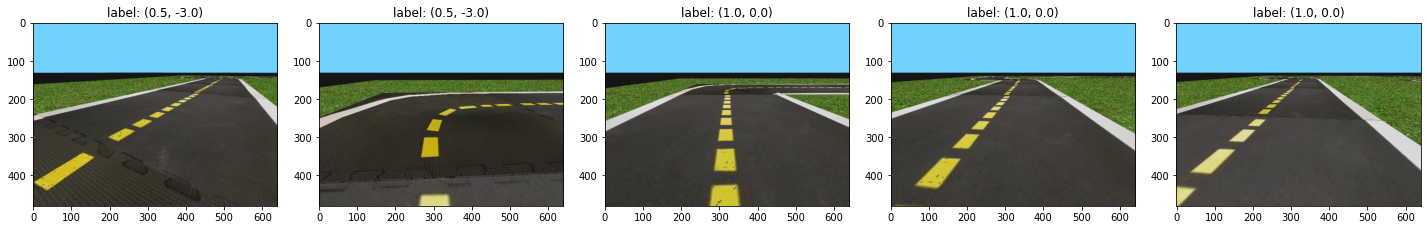

In [6]:
# Display raw data
display_frames(sampled_frames)

In [7]:
# processing frames with opencv
scale_precent = 0.2     # used for downscaling
crop_amount = 35        # pixel amount for cropping

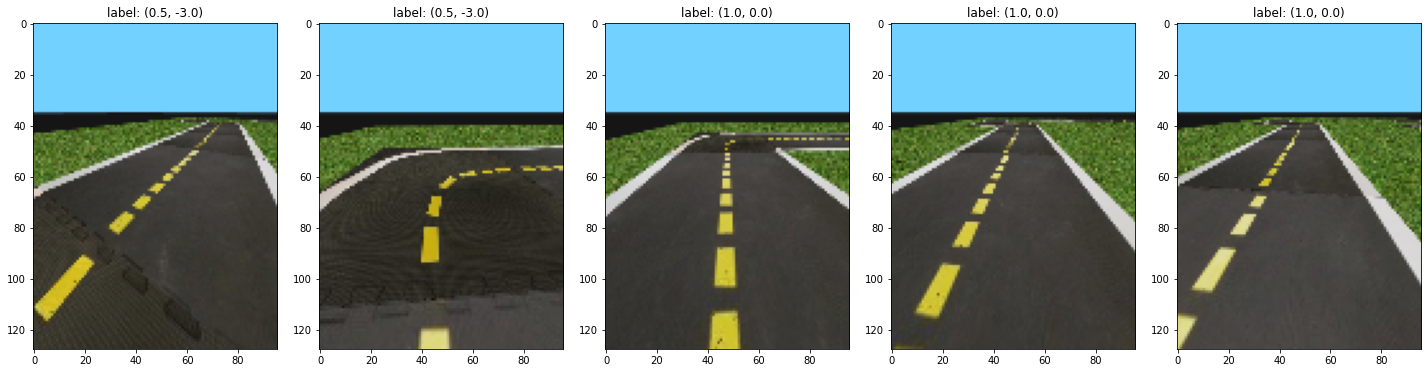

In [8]:
# downscaling
down_scaled_frames = []
for label, img in sampled_frames:
  newHeight = int(img.shape[0] * scale_precent)
  newWidth = int(img.shape[1] * scale_precent)
  down_scaled_frames.append((label, cv2.resize(img, (newHeight, newWidth))))

display_frames(down_scaled_frames)

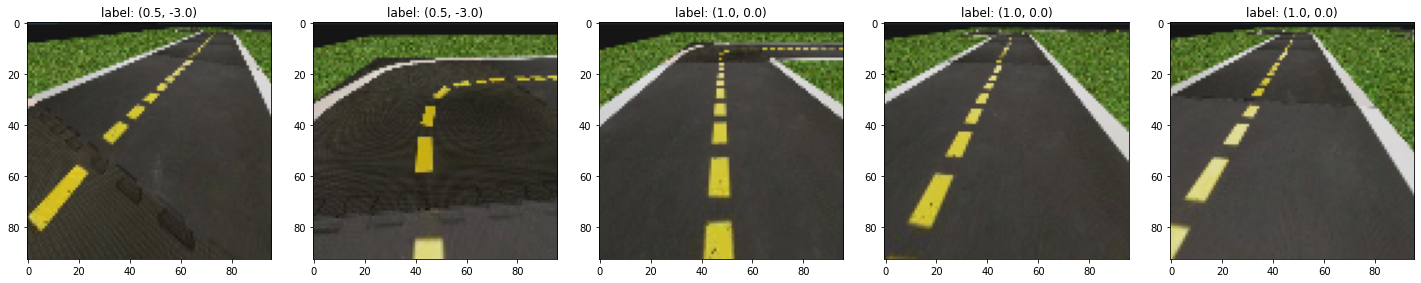

In [9]:
# cropping
cropped_frames = []
for label, img in down_scaled_frames:
  ds_size = img.shape
  cropped_frames.append((label, img[crop_amount : ds_size[0], 0 : ds_size[1]]))

display_frames(cropped_frames)

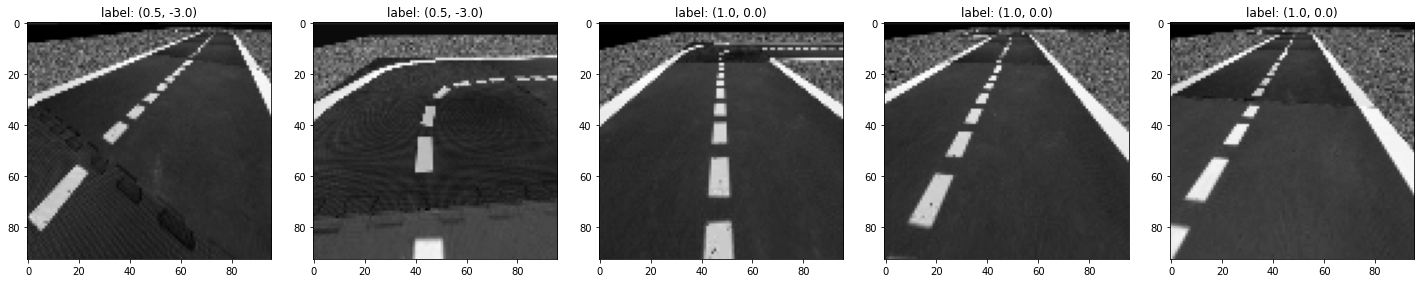

In [10]:
# grayscaling
grayscale_frames = []
for label, img in cropped_frames:
  grayscale_frames.append((label, cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))

display_frames(grayscale_frames, "gray")

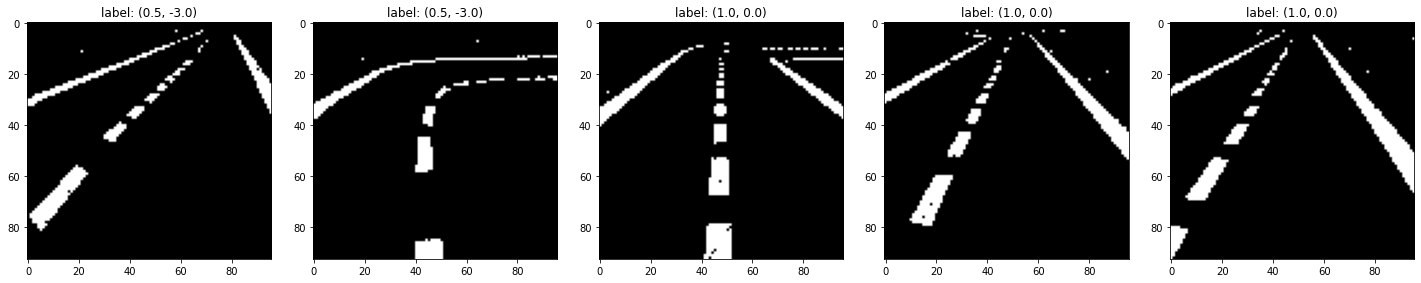

In [11]:
# thresholding
binary_frames = []
for label, img in grayscale_frames:
  _, thresholded_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
  binary_frames.append((label, thresholded_img))

display_frames(binary_frames, "gray")

In [12]:
# shuffling data
np.random.seed(1234)
np.random.shuffle(binary_frames)

In [13]:
# The preprocessing ends here
# The data is now saved to a single file, which can be loaded when training a model
with open("preprocessedData", "wb") as file:
  pickle.dump(binary_frames, file)

In [14]:
# When we need the data we load the preprocessed data
# Download already processed dataset from google drive
# We also have a bigger dataset, but for demonstrational purposes this is fine
!gdown 1NHJlZ4VhILZAPPh767jaG3sPO5wAL5fY --output /tmp/processedData.zip
local_zip = '/tmp/processedData.zip'
processed_data_path = "/tmp/processedData/"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall(processed_data_path)
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1NHJlZ4VhILZAPPh767jaG3sPO5wAL5fY
To: /tmp/processedData.zip
100% 61.1k/61.1k [00:00<00:00, 61.5MB/s]


In [15]:
data = []

# Reading saved processed data into processed_images
for filename in os.listdir(processed_data_path):
    file = open(os.path.join(processed_data_path, filename), "rb")
    data = pickle.load(file)

In [16]:
# Splitting the data
train_data_size = 0.8
test_data_size = 0.1
validation_data_size = 0.1

# splitting processed data into the 3 categories
trainIdx = int(train_data_size*len(data))
valIdx = trainIdx + int(validation_data_size*len(data))
trainData = data[:trainIdx]
valData = data[trainIdx: valIdx]
testData = data[valIdx:]

# separating labels from images, and flattening images (to 1D vectors)
trainY, trainX = [label for label,_ in trainData], [img.ravel() for _,img in trainData]
valY, valX = [label for label,_ in valData], [img.ravel() for _,img in valData]
testY, testX = [label for label,_ in testData], [img.ravel() for _,img in testData]

In [17]:
# Normalizing data
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
valX = scaler.transform(valX)
testX = scaler.transform(testX)

In [18]:
# Displaying statistics
print(f"training data count: {len(trainX)}")
print(f"testing data count: {len(testX)}")
print(f"validation data count: {len(valX)}")

training data count: 92
testing data count: 13
validation data count: 11
